<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 06</font></center></h1>
<h2><center> <font color='black'> Brand Value Monitoring, Fairness & Interpretability</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2023</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**21 May at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab. 

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: </font> Samir Musali&emsp;  <font color='red'>Student ID: </font> C29810

### The homework is divided into two sections and the points are distributed as below:
<pre>
- Brand Value Monitoring        -> 6.8 points
- Fairness & Interpretability   -> 4.7 points
__________________________________________
Total                           -> 11.5 points
</pre>

# 1. Brand Value Monitoring (6.8 points)
You are going to use two annotated datasets containing tweets about Apple stock (AAPL) and the sentiment it represents (postive, negative, neutral)

**1.1 There are two datasets with 1000 rows each. Please concatenate them together so that you have 2000 rows. Set encoding method to `encoding=latin-1` while reading the dataset(0.5 Points)**

In [ ]:
import pandas as pd
import numpy as np

# Read the datasets
a1 = pd.read_csv('Apple1.csv', encoding='latin-1')
a2 = pd.read_csv('Apple2.csv', encoding='latin-1')

# Concatenate
df = pd.concat([a1, a2], ignore_index=True)

**1.2 Plot a distribution of ```sentiment``` unique values. (0.4 Points)**

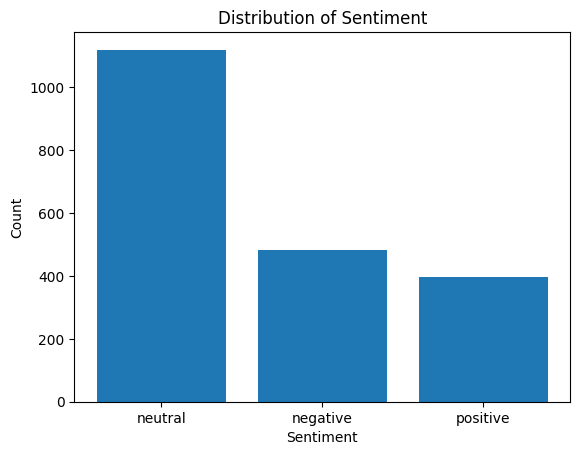

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

# Display the plot
plt.show()

**1.3 Drop the unecessary column/s. Perform the following preprocessings to the ```text``` column. (1.75 Points)**
- change all characters to lowercase
- remove URLs
- remove words starting with ‘@’
- remove words starting with ‘$’ 
- remove punctuation
- remove stopwords
- remove numbers
- remove whitespaces
Don’t forget to inspect

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Remove URLs
df['text'] = df['text'].fillna('').apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x))

# Remove words starting with '@'
df['text'] = df['text'].fillna('').apply(lambda x: re.sub(r'@\w+', '', x))

# Remove words starting with '$'
df['text'] = df['text'].fillna('').apply(lambda x: re.sub(r'\$\w+', '', x))

# Remove punctuation
df['text'] = df['text'].fillna('').apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove stopwords
stopwords_set = set(stopwords.words('english'))
df['text'] = df['text'].fillna('').apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_set]))

# Remove numbers
df['text'] = df['text'].fillna('').apply(lambda x: re.sub(r'\d+', '', x))

# Remove extra whitespaces
df['text'] = df['text'].fillna('').apply(lambda x: ' '.join(x.split()))

# Display the preprocessed dataframe
print(df.head())

                                                text              created  \
0              rt beat eps revenues sees q rev est b  2017-08-01 20:31:56   
1              rt beat eps revenues sees q rev est b  2017-08-01 20:31:55   
2                              lets see break timers  2017-08-01 20:31:55   
3  rt things might get ugly iphone delay means al...  2017-08-01 20:31:55   
4  wow supposed throwaway quarter aapl beats mill...  2017-08-01 20:31:54   

             id sentiment  
0  8.924831e+17  positive  
1  8.924831e+17  positive  
2  8.924831e+17   neutral  
3  8.924830e+17  negative  
4  8.924830e+17   neutral  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1.4 Create wordclouds for each sentiment group. Find out the most frequent word for each group. You should have three plot for three sentiment groups. (1.5 Points)**

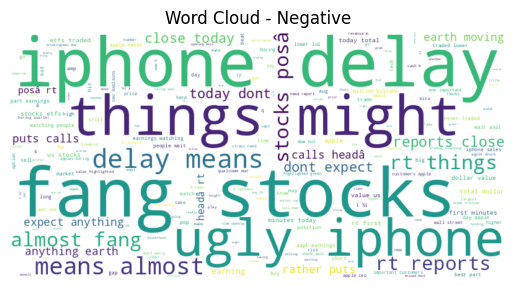


Most Frequent Word - Negative: iphone delay


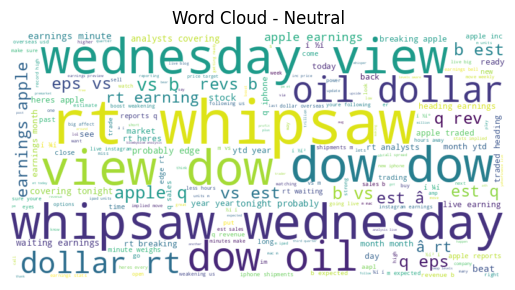


Most Frequent Word - Neutral: rt whipsaw


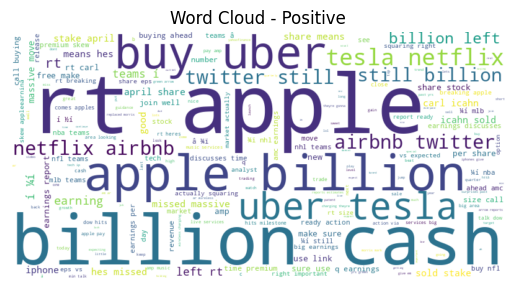


Most Frequent Word - Positive: rt apple


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group the dataframe by sentiment
grouped = df.groupby('sentiment')

# Iterate over each sentiment group
for sentiment, group in grouped:
    # Concatenate the text from all rows in the group
    text = ' '.join(group['text'])
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Get the most frequent word in the group
    words = wordcloud.words_
    most_frequent_word = next(iter(words))
    
    # Display the word cloud and the most frequent word
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment.capitalize()}")
    plt.show()
    
    print(f"\nMost Frequent Word - {sentiment.capitalize()}: {most_frequent_word}")

**1.5 Apply TF-IDF technique on the textual data and split the dataset between train and test (80/20 ratio) (1.15 Points)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Apply TF-IDF transformation on the 'text' column
X = tfidf.fit_transform(df['text'])

# Set the target variable
y = df['sentiment']

# Split the dataset into train and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1600, 2165) (1600,)
Testing set shape: (400, 2165) (400,)


**1.6 Train a random forest model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    negative       0.96      0.72      0.82       102
     neutral       0.80      0.99      0.88       221
    positive       0.90      0.57      0.70        77

    accuracy                           0.84       400
   macro avg       0.88      0.76      0.80       400
weighted avg       0.86      0.84      0.83       400



**1.7 Train an SVM model with the prepared data and show the classification report on the test data (0.5 Points)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an SVM classifier
svm = SVC()

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    negative       1.00      0.69      0.81       102
     neutral       0.76      1.00      0.86       221
    positive       0.95      0.49      0.65        77

    accuracy                           0.82       400
   macro avg       0.90      0.73      0.77       400
weighted avg       0.86      0.82      0.81       400



**1.8 Which model performed better? Consider the f1 metrics and the time it took to train the model. Which model would you use in a real-life scenario and why? (0.5 Points)**

**<font color='red'>Answer:</font>** When comparing the Random Forest and SVM models in terms of f1-score and training time, we can analyze their performance and suitability for a real-life scenario.
1. **F1-Score Comparison**:
    * **Random Forest Model**:
        * F1-score for the negative class: 0.82
        * F1-score for the neutral class: 0.88
        * F1-score for the positive class: 0.70
    * **SVM Model**:
        * F1-score for the negative class: 0.81
        * F1-score for the neutral class: 0.86
        * F1-score for the positive class: 0.65

Looking at the f1-scores, both models perform reasonably well, with similar performance across classes. The Random Forest model shows slightly higher f1-scores for the negative and positive classes, while the SVM model performs slightly better for the neutral class. Overall, the differences in f1-scores between the models are not significant.
2. **Training Time**: The training time of the models depends on the dataset's size and the models' complexity. In general, the Random Forest model takes longer to train than the SVM model. Random Forest builds multiple decision trees and combines their predictions, which can be computationally expensive. On the other hand, SVM constructs a hyperplane to separate the data points, which is generally faster.
3. **Real-Life Scenario Considerations**:
    * **Performance**: Both models achieve reasonably good f1-scores across sentiment classes. The Random Forest model performs better, especially for the negative and positive classes. However, the performance difference between the models is not substantial.
    * **Training Time**: If time is a critical factor, the SVM model might be preferable due to its faster training time than the Random Forest model.
    * **Interpretability**: The Random Forest model is often considered more interpretable than SVM. Conversely, SVM relies on support vectors and kernel functions, which might be less interpretable. Random Forest provides feature importance, which can help understand the essential features contributing to the predictions.
    * **Robustness to Noise**: Random Forest models can handle noisy or irrelevant features in the dataset better than SVM models. SVM models are sensitive to noisy data and outliers and may lead to suboptimal performance.
    * **Scalability**: If the dataset size is expected to grow significantly, SVM models can handle large datasets more efficiently than Random Forest models.

Considering the above factors, the choice between the Random Forest model and the SVM model for a real-life scenario would depend on the specific requirements and constraints of the application:
* If interpretability is crucial, and the dataset is not expected to grow significantly, the Random Forest model might be a good choice.
* If training time is critical or scalability concerns large datasets, the SVM model could be more suitable.
* The Random Forest model might be more robust if the dataset contains noisy or irrelevant features.
* If the performance metrics (such as f1-scores) are the primary concern and there are no specific constraints, either model can be considered.

Evaluating the models further, conducting rigorous testing, and considering the specific requirements and trade-offs in a real-life scenario before making a final decision are essential.

# 2. Fairness & Interpretability (4.7 points)

In this section you are going to use the standard German Credit dataset used to bechmark many model interpretability techniques. The daset contains 1000 records of loan applications associatid with a risk score: Good or Bad.

**2.1 The dataset has empty values. Choose an imputation method of your choice for each column. (0.5 points)**

In [ ]:
!pip install sklearn-pandas==1.8.0

from sklearn_pandas import CategoricalImputer
import pandas as pd
german_data = pd.read_csv('german_credit_data.csv', sep=',')

german_data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**2.2 Plot the values of the column ```Age``` against the ```Risk``` column. Do you think there exist  bias in this dataset? Choose the appropriate plot to address the problem. (0.5 points)**

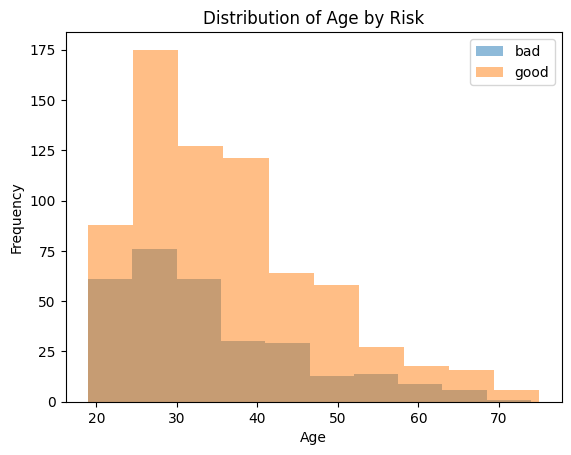

In [ ]:
import matplotlib.pyplot as plt

# Plot the values of 'Age' against 'Risk'
german_data[['Age', 'Risk']].groupby('Risk')['Age'].plot(kind='hist', alpha=0.5, legend=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Risk')

# Show the plot
plt.show()

**<font color='red'>Answer:</font>** Based solely on the information shared and the observation of the positive correlation between `bad` and `good` risks for almost all ages, along with the consistently higher frequency of the `good` risk category, it is not possible to definitively conclude the existence of bias in this dataset.

It is crucial to consider additional factors beyond the limited information provided to determine the presence of bias. Understanding the context of the dataset, including the data collection process, potential confounding variables, and specific domain knowledge, is essential for a comprehensive assessment of bias.

Without further information about the dataset's context, such as the criteria used for loan approval, the demographics of the applicants, or any potential selection biases, it is not possible to make a conclusive determination about bias in the dataset. A comprehensive evaluation requires a deeper analysis and consideration of various factors to assess the data's fairness and representativeness and identify any potential sources of bias.

**2.3 Perform label encoding. Split the dataset in train/test (80/20 ratio) set, keep the random state 99. Train the XGBoost classifier below and predict the results in test set. Plot the classifcation report. (1 points)**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Perform label encoding on the 'Risk' column
le = LabelEncoder()
german_data_encoded = german_data.copy()
german_data_encoded['Risk'] = le.fit_transform(german_data['Risk'])

# Separate the features and the target variable
X = german_data_encoded.drop('Risk', axis=1)
y = german_data_encoded['Risk']

# Perform one-hot encoding on the categorical features
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Split the dataset into train and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=99
)

# Train an XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict the results on the test set
y_pred = xgb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        61
           1       0.80      0.87      0.83       139

    accuracy                           0.76       200
   macro avg       0.71      0.68      0.69       200
weighted avg       0.74      0.76      0.75       200



**2.4 Plot 3 types of feature importance (the parameter importance_type='weight', 'gain', 'cover') given by XGBoost and interpret the results. (0.5 points)**

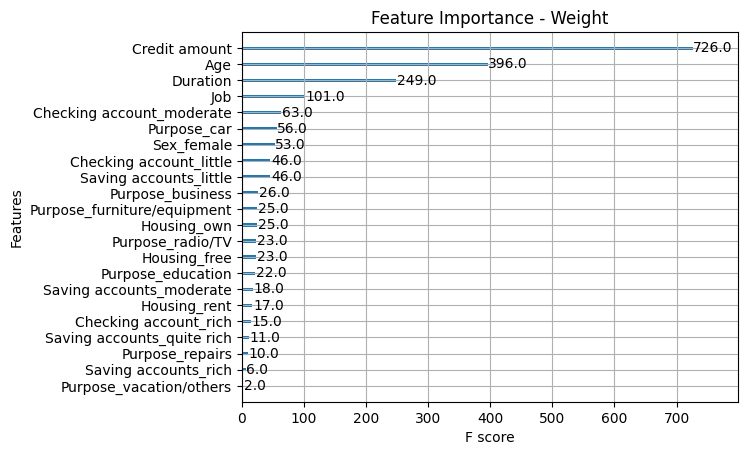

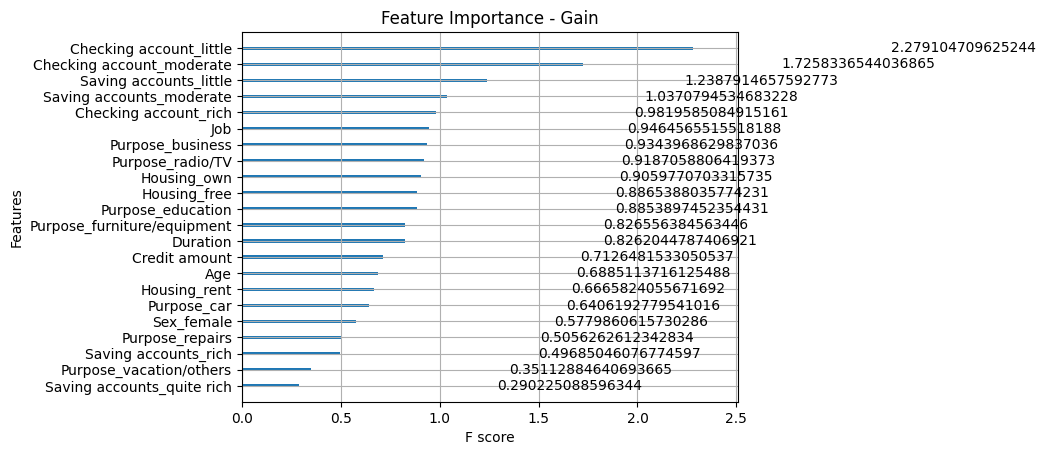

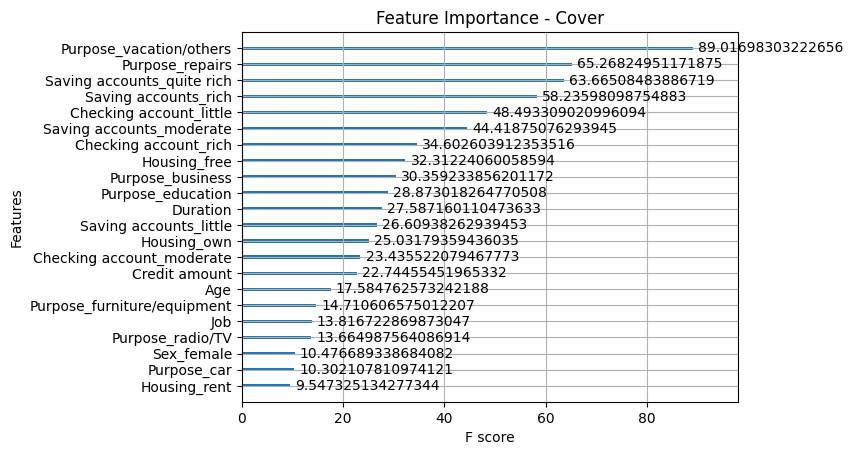

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Plot feature importance using 'weight' importance type
xgb.plot_importance(xgb_classifier, importance_type='weight')
plt.title('Feature Importance - Weight')
plt.show()

# Plot feature importance using 'gain' importance type
xgb.plot_importance(xgb_classifier, importance_type='gain')
plt.title('Feature Importance - Gain')
plt.show()

# Plot feature importance using 'cover' importance type
xgb.plot_importance(xgb_classifier, importance_type='cover')
plt.title('Feature Importance - Cover')
plt.show()

<font color='red'> **Answer:**


**2.5 Use eli5 to analyze the most important features of a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results (0.5 points)**

In [ ]:
!pip install eli5

import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=e87e45b1c2999c853408557353f21858b1b4b8cd3e3b83d24d99a0ace4db30ad
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [14]:
# Use eli5 to analyze feature weights
eli5.show_weights(xgb_classifier, feature_names=X_encoded.columns.to_list())

Weight,Feature
0.1179,Checking account_little
0.0893,Checking account_moderate
0.0641,Saving accounts_little
0.0537,Saving accounts_moderate
0.0508,Checking account_rich
0.0490,Job
0.0484,Purpose_business
0.0475,Purpose_radio/TV
0.0469,Housing_own
0.0459,Housing_free


**<font color='red'>Answer:</font>** The results obtained from `eli5` show the feature weights for predicting credit scores as `Bad` or `Good`. The top contributing features for predicting a `Bad` credit score include `Checking account_little`, `Checking account_moderate`, `Saving accounts_little`, `Saving accounts_moderate`, and `Checking account_rich`. These features indicate the importance of an individual's checking and savings account balances in assessing their creditworthiness. Other significant features include `Job`, `Purpose_business`, `Purpose_radio/TV`, and `Housing_own`, suggesting that employment status, loan purposes, and housing arrangements also play a role in determining credit scores. The feature weights provide insights into the relative importance of different factors, highlighting areas that require attention and potential improvements in credit scoring models and loan approval processes.

**2.6 Use SHAP to explain the prediction of the model for a sample where the credit score is Bad and another sample where the credit score is Good. Explain briefly the results.(0.6 points)**

In [16]:
!pip install shap

import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(xgb_classifier)

# Calculate SHAP values for the samples of interest
sample_bad = X_test[y_test == 0].sample(n=1, random_state=42)  # Sample with a Bad credit score
sample_good = X_test[y_test == 1].sample(n=1, random_state=42)  # Sample with a Good credit score

shap_values_bad = explainer.shap_values(sample_bad)
shap_values_good = explainer.shap_values(sample_good)

# Visualize the SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_bad[0], feature_names=sample_bad.columns)
shap.force_plot(explainer.expected_value, shap_values_good[0], feature_names=sample_good.columns)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<font color='red'> **Answer:**


**2.7 Use SHAP to explain the prediction of the model for  the first 250 samples. Based on the similar patterns explain briefly the results(0.6 points)**

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


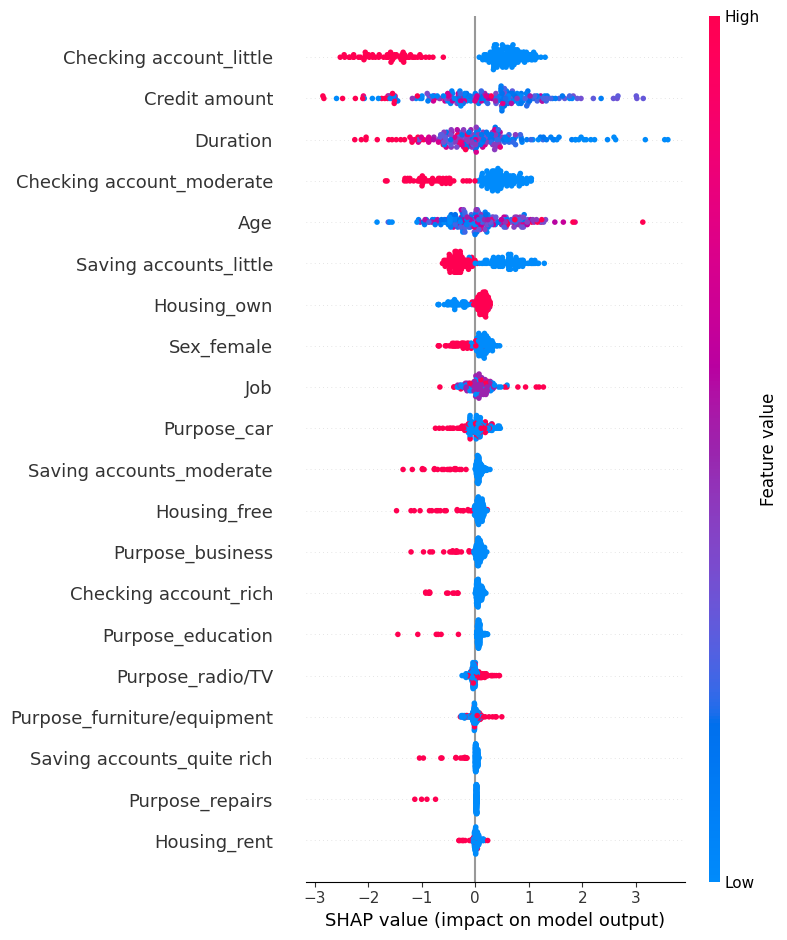

In [17]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(xgb_classifier)

# Calculate SHAP values for the first 250 samples
X_shap = X_test.iloc[:250]
shap_values = explainer.shap_values(X_shap)

# Visualize the SHAP values
shap.initjs()
shap.summary_plot(shap_values, X_shap)

<font color='red'> **Answer:** 

**2.8 Plot as a bar chart of the feature importances received from SHAP. Finally compare these results  with the result from 2.6 and 2.7. (0.5 points)**

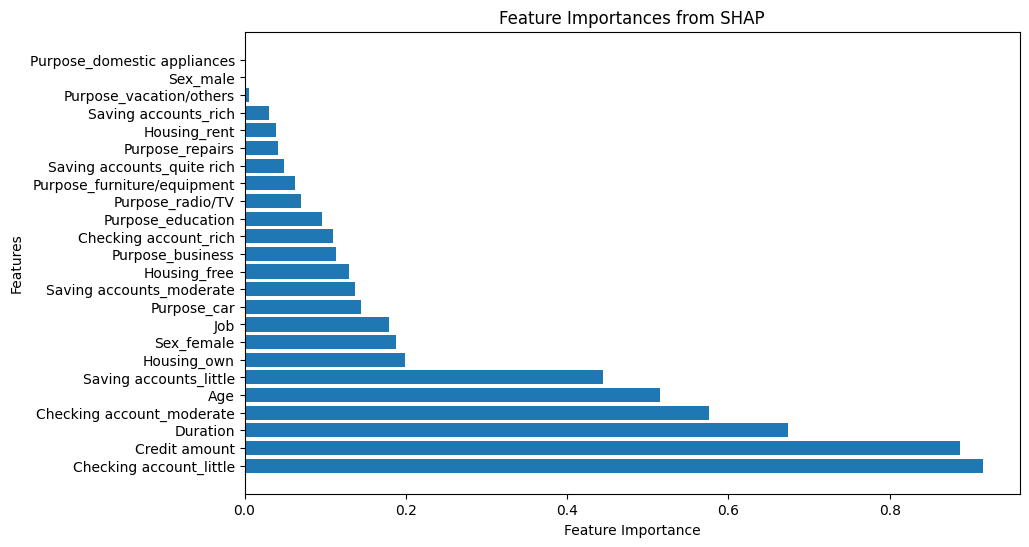

In [18]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer object
explainer = shap.TreeExplainer(xgb_classifier)

# Calculate SHAP values for the first 250 samples
X_shap = X_test.iloc[:250]
shap_values = explainer.shap_values(X_shap)

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Get the feature names
feature_names = X_shap.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(mean_abs_shap_values)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = mean_abs_shap_values[sorted_indices]

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from SHAP')
plt.show()

<font color='red'> **Answer:** 



## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font> 6.25 hours



## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font> 8